
Correlation Matrix:
 Emissions_Load    1.000000
pres_emission     0.039019
wspd_emission     0.008794
snow_emission     0.002429
prcp_emission    -0.008098
wdir_emission    -0.024562
tmin_emission    -0.033929
tavg_emission    -0.035261
tmax_emission    -0.036595
Name: Emissions_Load, dtype: float64


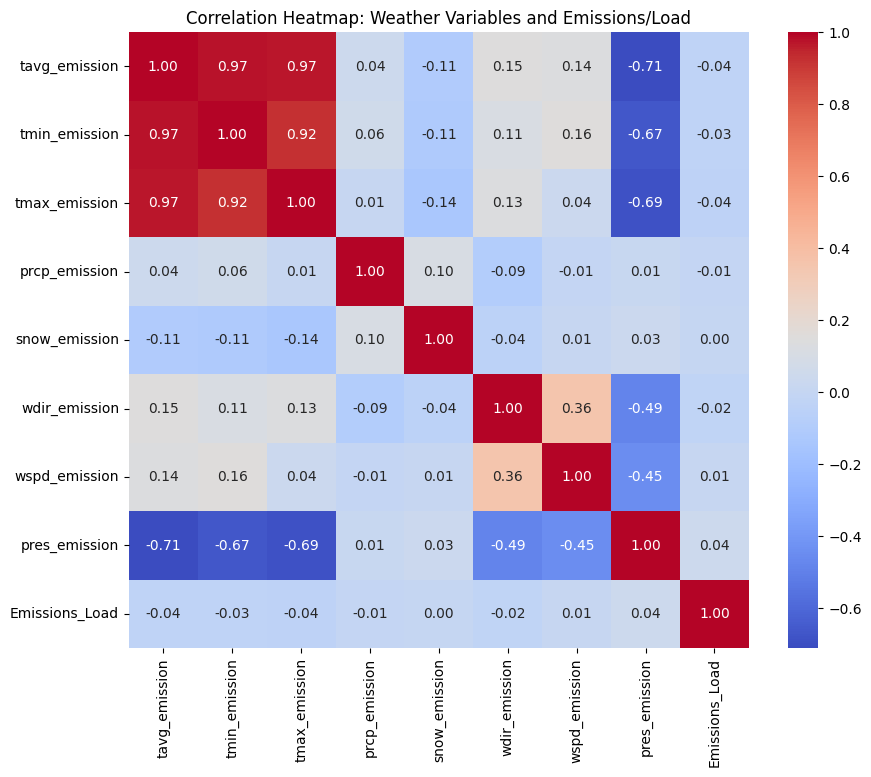


Feature Importances:
          Feature  Importance
6  wspd_emission    0.377573
7  pres_emission    0.220476
5  wdir_emission    0.119252
1  tmin_emission    0.115870
0  tavg_emission    0.081675
2  tmax_emission    0.079605
3  prcp_emission    0.005528
4  snow_emission    0.000022


<ipython-input-1-05cfbec29c08>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


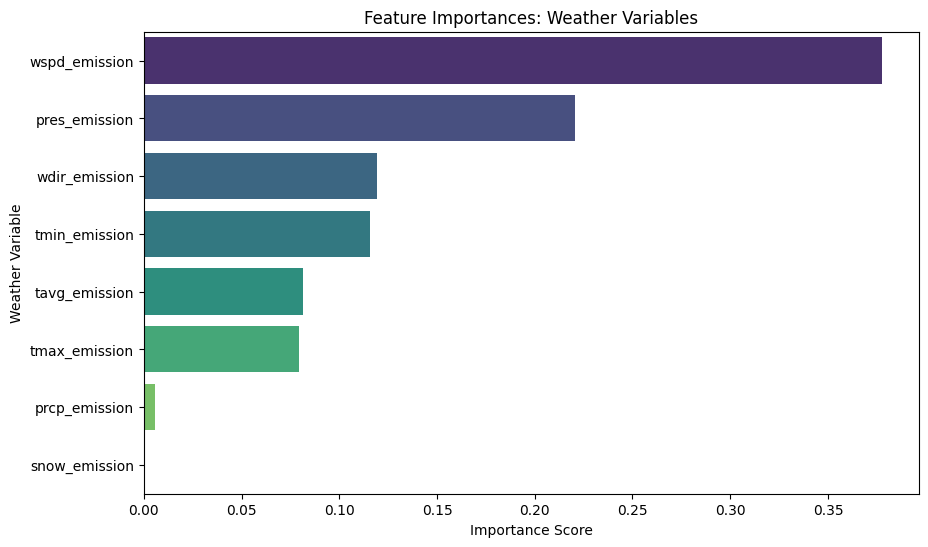

In [1]:
# Google Colab Version: Displaying Graphs Directly

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load the dataset from GitHub
file_path = "https://raw.githubusercontent.com/apownukepcc/ForecastingDailyEmissions/refs/heads/main/combinedWeatherValues.csv"
data = pd.read_csv(file_path)

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Define emissions parameters and load
emissions_params = ['SO2TONS', 'NOXTONS', 'COTONS']
load_param = 'LOADMWBA'

# Separate emissions and load data
emissions_data = data[data['Parameter'].isin(emissions_params)]
load_data = data[data['Parameter'] == load_param]

# Merge emissions and load data on date and source
merged_data = pd.merge(
    emissions_data,
    load_data,
    on=["date", "Source"],
    suffixes=("_emission", "_load"),
    how="left"
)

# Calculate emissions/load only for rows where both emissions and load are available
merged_data["Emissions_Load"] = merged_data["Value_emission"] / merged_data["Value_load"]

# Drop rows with NaN in Emissions_Load
merged_data = merged_data.dropna(subset=["Emissions_Load"])

# Define predictors and target
weather_features = ['tavg_emission', 'tmin_emission', 'tmax_emission', 'prcp_emission',
                    'snow_emission', 'wdir_emission', 'wspd_emission', 'pres_emission']
target = 'Emissions_Load'

# Correlation Analysis
correlation_matrix = merged_data[weather_features + [target]].corr()
print("\nCorrelation Matrix:\n", correlation_matrix[target].sort_values(ascending=False))

# Display correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Weather Variables and Emissions/Load')
plt.show()

# Train Random Forest Model for Feature Importance
X = merged_data[weather_features]
y = merged_data[target]

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': weather_features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", feature_importances)

# Display feature importance bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances: Weather Variables')
plt.xlabel('Importance Score')
plt.ylabel('Weather Variable')
plt.show()
